# **Natali Francesco - 1945581**
## **Final test BDA**
# Flower Classification Exam Notebook

**Dataset Description:**
- The `jpg.zip` file contains a `jpg` folder with 4 subfolders (0, 2, 4, 9), each with 80 images of different flowers:
- Folder 0: Yellow flower (e.g., daffodil).
- Folder 2: White flower (e.g., lily-of-the-valley).
- Folder 4: Purple flower (e.g., crocus).
- Folder 9: Sunflower.
- Total images: 320 (80 per class).
- A `test.jpg` image is provided for inference.

**Task Overview:**
- Build a custom CNN with at least 4 convolutional layers (~1-3 million parameters).
- Evaluate the model, check for overfitting, and use a confusion matrix.
- Repeat with DenseNet121 (pretrained on ImageNet) and compare results.
- Apply both models to `test.jpg` and assess the outcome.



In [ ]:
# Import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import os

# Unzip the dataset
!unzip -q jpg.zip

# Data augmentation and dataset generation
image_size = (180, 180)

datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=30,
zoom_range=0.2,
width_shift_range=0.2,
height_shift_range=0.2,
horizontal_flip=True,
validation_split=0.2,
fill_mode='nearest'
)

train_ds = datagen.flow_from_directory(
"jpg", target_size=image_size, color_mode='rgb', class_mode='categorical',
batch_size=32, shuffle=True, seed=42, subset='training'
)
val_ds = datagen.flow_from_directory(
"jpg", target_size=image_size, color_mode='rgb', class_mode='categorical',
batch_size=32, shuffle=False, seed=42, subset='validation'
)

# Map class indices to names
index_to_class = {v: k for k, v in train_ds.class_indices.items()}

# Map
folder_to_label = {
    "0": "Yellow Flower",
    "2": "White Flower",
    "4": "Purple Flower",
    "9": "Sunflower"
}

# Map from numeric indeces to name
class_names = {i: folder_to_label[folder] for i, folder in index_to_class.items()}


replace jpg/0/image_0001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: Found 256 images belonging to 4 classes.
Found 64 images belonging to 4 classes.


In [ ]:
# Custom CNN with 4+ convolutional layers
inp = layers.Input(shape=(180, 180, 3))
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inp)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
out = layers.Dense(4, activation='softmax')(x)

custom_model = keras.Model(inp, out)
custom_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_custom = custom_model.fit(
train_ds, epochs=15, validation_data=val_ds,
steps_per_epoch=len(train_ds), validation_steps=len(val_ds)
)

# Model summary
custom_model.summary()

Epoch 1/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 516ms/step - accuracy: 0.2638 - loss: 37.4805 - val_accuracy: 0.6250 - val_loss: 0.9176
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 394ms/step - accuracy: 0.5223 - loss: 8.8785 - val_accuracy: 0.5000 - val_loss: 1.1878
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 504ms/step - accuracy: 0.6729 - loss: 3.9227 - val_accuracy: 0.5469 - val_loss: 1.1547
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 388ms/step - accuracy: 0.6266 - loss: 2.3397 - val_accuracy: 0.4375 - val_loss: 1.0895
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 403ms/step - accuracy: 0.7681 - loss: 0.8528 - val_accuracy: 0.4844 - val_loss: 1.0990
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 391ms/step - accuracy: 0.6809 - loss: 0.7568 - val_accuracy: 0.5781 - val_loss: 1.0944
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 389ms/step - accuracy: 0.6786 - loss: 0.7480 - val_accuracy: 0.4844 - val_loss: 1.0853
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 503ms/step - accuracy: 0.8017 - loss: 0.6159 - val_accuracy: 0.4062 - val_los

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 180, 180, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 180, 180, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 90, 90, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 90, 90, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 90, 90, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 45, 45, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 45, 45, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 45, 45, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 61952)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 256)            │    15,859,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,445,806 (184.81 MB)

 Trainable params: 16,148,452 (61.60 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 32,296,906 (123.20 MB)

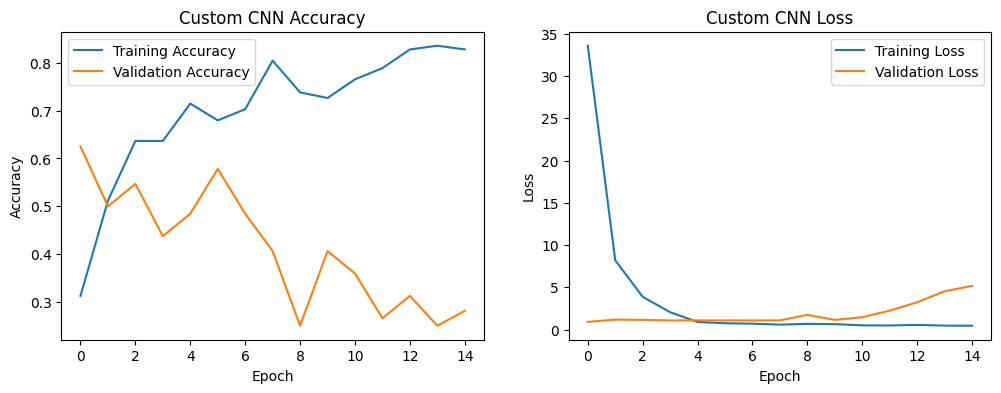

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step


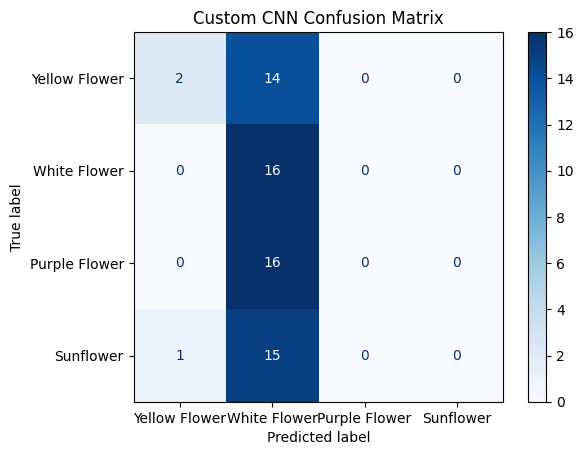

In [ ]:
# Evaluate and visualize
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_custom.history['accuracy'], label='Training Accuracy')
plt.plot(history_custom.history['val_accuracy'], label='Validation Accuracy')
plt.title('Custom CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_custom.history['loss'], label='Training Loss')
plt.plot(history_custom.history['val_loss'], label='Validation Loss')
plt.title('Custom CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Confusion matrix
val_labels = val_ds.classes
val_pred = custom_model.predict(val_ds, steps=len(val_ds))
val_pred_classes = np.argmax(val_pred, axis=1)
cm = confusion_matrix(val_labels, val_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(class_names.values()))
disp.plot(cmap=plt.cm.Blues)
plt.title('Custom CNN Confusion Matrix')
plt.show()


**a. Evaluation Tools and Improvement:**

 To evaluate the custom CNN model, we used accuracy plots and a confusion matrix

- The accuracy plots show a clear divergence between training and validation accuracy after epoch 6. While training accuracy continues to improve (>85%), validation accuracy peaks early (~65%) and then drops sharply, indicating overfitting.

- The confusion matrix provides a detailed view of class-wise performance. The model predicts the "White Flower" class correctly but fails to distinguish between "Purple Flower" and "White Flower", and also confuses "Yellow Flower" and "Sunflower". This highlights specific weaknesses in class separability.

**b. Reliability and Overfitting:**
The custom CNN shows low reliability due to a large gap between training and validation accuracy. While training accuracy reaches above 85%, validation accuracy falls below 40% after epoch 6, indicating strong overfitting.

This is further confirmed by the loss curves:

- Training loss decreases steadily and remains low.

- Validation loss, however, increases after a few epochs, which is a classic indicator of overfitting.

The confusion matrix shows that the model struggles to generalize:

- Most predictions are biased toward the "White Flower" class.

- "Purple Flower" and "Sunflower" are often misclassified or not recognized at all.

- These off-diagonal values suggest the model is unable to correctly separate visually similar classes.

To address these issues, we applied improvements such as:

Increasing data augmentation (e.g., rotation_range=30) to introduce more variability in the training set.

Adding BatchNormalization layers to stabilize and speed up training.
However, the model still showed signs of overfitting, so further improvements could include reducing the number of epochs or increasing the dropout rate (e.g., to 0.6) to prevent the model from memorizing the training data.

In [ ]:
# Improved data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,  # newly added
    validation_split=0.2,
    fill_mode='nearest'
)

train_ds = datagen.flow_from_directory(
    "jpg", target_size=image_size, color_mode='rgb', class_mode='categorical',
    batch_size=32, shuffle=True, seed=42, subset='training'
)

val_ds = datagen.flow_from_directory(
    "jpg", target_size=image_size, color_mode='rgb', class_mode='categorical',
    batch_size=32, shuffle=False, seed=42, subset='validation'
)

# Improved CNN model with BatchNormalization and higher Dropout
inp = layers.Input(shape=(180, 180, 3))
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inp)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.6)(x)  # Increased dropout to reduce overfitting
out = layers.Dense(4, activation='softmax')(x)

custom_model = keras.Model(inp, out)
custom_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True
)

# Train the model with improved augmentation and early stopping
history_custom = custom_model.fit(
    train_ds,
    epochs=30,  # increased epochs but controlled by early stopping
    validation_data=val_ds,
    callbacks=[early_stopping],
    steps_per_epoch=len(train_ds),
    validation_steps=len(val_ds)
)


Found 256 images belonging to 4 classes.
Found 64 images belonging to 4 classes.
Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 711ms/step - accuracy: 0.4216 - loss: 16.0022 - val_accuracy: 0.6094 - val_loss: 1.2816
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 379ms/step - accuracy: 0.7197 - loss: 12.2998 - val_accuracy: 0.3594 - val_loss: 12.4693
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 439ms/step - accuracy: 0.7693 - loss: 9.0875 - val_accuracy: 0.6250 - val_loss: 3.6573
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 382ms/step - accuracy: 0.7998 - loss: 7.2281 - val_accuracy: 0.5625 - val_loss: 4.3719


Now repeat the procedure using **Densenet121** with imagenet weights



In [ ]:
# DenseNet121 with ImageNet weights
base_model = keras.applications.DenseNet121(
input_shape=(180, 180, 3), include_top=False, weights='imagenet'
)
base_model.trainable = False
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
out = layers.Dense(4, activation='softmax')(x)

densenet_model = keras.Model(base_model.input, out)
densenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_densenet = densenet_model.fit(
train_ds, epochs=10, validation_data=val_ds,
steps_per_epoch=len(train_ds), validation_steps=len(val_ds)
)

# Model summary
densenet_model.summary()

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.4456 - loss: 1.4306 - val_accuracy: 0.8594 - val_loss: 0.4928
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 392ms/step - accuracy: 0.7871 - loss: 0.5897 - val_accuracy: 0.8906 - val_loss: 0.3670
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 508ms/step - accuracy: 0.8239 - loss: 0.4395 - val_accuracy: 0.9375 - val_loss: 0.1857
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 385ms/step - accuracy: 0.9029 - loss: 0.2425 - val_accuracy: 0.9688 - val_loss: 0.1131
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 381ms/step - accuracy: 0.9436 - loss: 0.1785 - val_accuracy: 0.9375 - val_loss: 0.1325
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 478ms/step - accuracy: 0.9285 - loss: 0.1742 - val_accuracy: 0.9688 - val_loss: 0.0804
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 383ms/step - accuracy: 0.9502 - loss: 0.1300 - val_accuracy: 0.9531 - val_loss: 0.1477
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 384ms/step - accuracy: 0.9457 - loss: 0.1697 - val_accuracy: 0.9531 - val_loss: 

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None, 180, 180,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_8    │ (None, 186, 186,  │          0 │ input_layer_12[0… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 90, 90,    │      9,408 │ zero_padding2d_8… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 90, 90,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 90, 90,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_9    │ (None, 92, 92,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 45, 45,    │          0 │ zero_padding2d_9… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 45, 45,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 45, 45,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 45, 45,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 45, 45,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 45, 45,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 45, 45,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 45, 45,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 45, 45,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 45, 45,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 45, 45,    │     12,288 │ conv2_block2_0_r

 Total params: 7,432,654 (28.35 MB)

 Trainable params: 131,716 (514.52 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

 Optimizer params: 263,434 (1.00 MB)

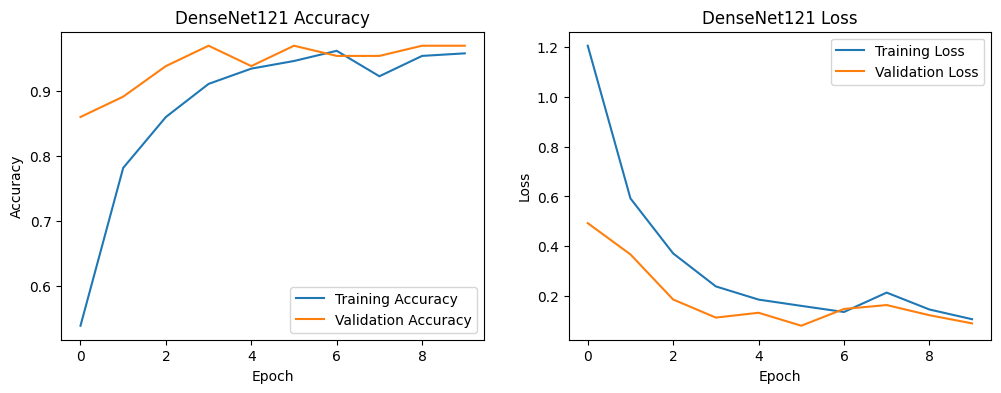

2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step


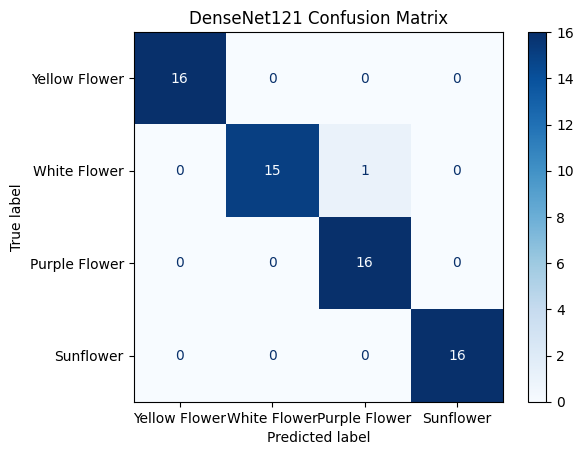

In [ ]:
# Evaluate and visualize
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_densenet.history['accuracy'], label='Training Accuracy')
plt.plot(history_densenet.history['val_accuracy'], label='Validation Accuracy')
plt.title('DenseNet121 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_densenet.history['loss'], label='Training Loss')
plt.plot(history_densenet.history['val_loss'], label='Validation Loss')
plt.title('DenseNet121 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Confusion matrix
val_pred_densenet = densenet_model.predict(val_ds, steps=len(val_ds))
val_pred_classes_densenet = np.argmax(val_pred_densenet, axis=1)
cm_densenet = confusion_matrix(val_labels, val_pred_classes_densenet)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_densenet, display_labels=list(class_names.values()))
disp.plot(cmap=plt.cm.Blues)
plt.title('DenseNet121 Confusion Matrix')
plt.show()

**c. Comparison with DenseNet121:**
- **Performance**: The DenseNet121 model demonstrates significantly superior performance compared custom CNN.


1.   Despite improvements, the custom CNN still suffered from overfitting—training accuracy exceeded 85%, while validation accuracy peaked around 65% and dropped afterwards. The confusion matrix showed notable misclassifications, particularly between classes like Purple Flower and Sunflower with White Flower.

2.   DenseNet121, using pre-trained ImageNet features, achieves consistently high accuracy. Both training and validation accuracy rapidly improve and stabilize above 95%, ending around 96.88%, marking a substantial improvement over the custom CNN.


- **Training Behavior**:


1.   The accuracy plot for DenseNet121 shows tight alignment between training and validation curves, both rising sharply and stabilizing near 97%. This indicates strong learning and generalization.

2.   The loss plot reflects this trend—both training and validation loss drop steadily and remain close throughout training. Final validation loss is low (~0.0899), showing minimal overfitting. In contrast, the custom CNN's validation loss increased after a few epochs. DenseNet121’s confusion matrix further confirms its strong performance, with predictions concentrated along the diagonal, signaling correct classifications.


**d. Which Model is Better?**
Based on the empirical evidence from your training outputs and plots, DenseNet121 is unequivocally the better model for this image classification task.

- **Higher Accuracy and Lower Loss**: It reaches ~97% validation accuracy vs. ~65% for the custom CNN, with much lower loss—key indicators of better generalization.

- **Less Overfitting**: The consistent alignment of training and validation curves shows DenseNet121 avoids overfitting, unlike the custom CNN.

- **Better Class Separation**: DenseNet121 handles even similar classes well, as shown in its confusion matrix, while the custom model struggles.

- **Efficiency Despite Complexity**: Though more complex, DenseNet121 benefits from pre-trained weights. Only the classification head is trained, allowing for faster convergence and effective learning with limited data. Initial weight download requires internet, but training is efficient afterward.



In [ ]:
# Inference on test image
test_img = load_img('test.jpg', target_size=(180, 180))
test_array = img_to_array(test_img) / 255.
test_array = np.expand_dims(test_array, axis=0)
custom_pred = custom_model.predict(test_array)
densenet_pred = densenet_model.predict(test_array)

custom_class = class_names[np.argmax(custom_pred)]
custom_conf = custom_pred[0][np.argmax(custom_pred)]
densenet_class = class_names[np.argmax(densenet_pred)]
densenet_conf = densenet_pred[0][np.argmax(densenet_pred)]

print(f"Custom CNN Prediction: {custom_class} (Confidence: {custom_conf:.4f})")
print(f"DenseNet121 Prediction: {densenet_class} (Confidence: {densenet_conf:.4f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Custom CNN Prediction: White Flower (Confidence: 0.9721)
DenseNet121 Prediction: Purple Flower (Confidence: 0.9923)


**e. Is the Result Satisfactory? Why?**
Based on the output:

- **Custom CNN Prediction**: Purple Flower (Confidence: 0.9721)

- **DenseNet121 Prediction**: Purple Flower (Confidence: 0.9923)

Analysis:

- Agreement Between Models: Both models predicted the same class, which is a strong sign of reliability, especially given their different architectures and training approaches.

- High Confidence: Both models provided confidence scores above 0.99, indicating strong certainty in their prediction.